### Aim is to scrape data from British Airways website https://www.airlinequality.com/airline-reviews/british-airways where the main goal is to extract information from the website and analyze the overall data to get insights which can help for the betterment of the company. Here I used NLP to get information about the reviews and beautifulsoup library to scrape the data.

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup as bs
import requests

# **Data Extraction**

In [ ]:
reviews=[]
date=[]
country=[]

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/page/"
for page in range (1,356):
    req=requests.get(base_url+str(page)+'/')
    soup=bs(req.content,'html5')

    for item in soup.find_all("div", class_="text_content"):
      reviews.append(item.text) 

    for item in soup.find_all("time"):
      date.append(item.text)
      
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" () "))

In [ ]:
len(reviews)

3546

In [ ]:
len(date)

3546

In [ ]:
len(country)

3546

In [ ]:
df=pd.DataFrame({'reviews':reviews,'date':date,'country':country})
df.head()

,reviews,date,country
0,✅ Trip Verified | BA overbook every flight to ...,17th May 2023,United Kingdom
1,✅ Trip Verified | \nThe flights were all on t...,17th May 2023,United Kingdom
2,Not Verified | Only the second time flying BA ...,14th May 2023,United States
3,✅ Trip Verified | I wasn't going to bother rev...,14th May 2023,United Kingdom
4,✅ Trip Verified | I booked business class tic...,13th May 2023,United States


In [ ]:
stars=[]
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/page/"
for page in range (1,356):
    req=requests.get(base_url+str(page)+'/')
    soup=bs(req.content,'html5')

    for item in soup.find_all("div", class_="rating-10"):
      try:
       stars.append(item.span.text) 
      except:
        stars.append('None')


len(stars)

3901

In [ ]:
stars1=stars
stars1

['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5',
 '1',
 '1',
 '3',
 '3',
 '1',
 '1',
 '1',
 '1',
 '2',
 '5',
 '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5',
 '1',
 '2',
 '1',
 '1',
 '10',
 '2',
 '5',
 '1',
 '3',
 '4',
 '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5',
 '3',
 '1',
 '1',
 '2',
 '1',
 '9',
 '5',
 '1',
 '2',
 '7',
 '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5',
 '4',
 '1',
 '3',
 '9',
 '10',
 '1',
 '3',
 '1',
 '1',
 '1',
 '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5',
 '1',
 '3',
 '2',
 '8',
 '3',
 '1',
 '1',
 '1',
 '7',
 '1',
 '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '1',
 '8',
 '1',
 '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5',
 '1',
 '2',
 '10',
 '4',
 '1',
 '8',
 '6',
 '7',
 '1',
 '1',
 '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5',
 '4',
 '5',
 '1',
 '8',
 '1',
 '9',
 '10',
 '10',
 '10',
 '2',
 '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5',
 '4',
 '3',
 '9',
 '9',
 '9',
 '2',
 '3',
 '2',
 '9',
 '9',
 '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5',
 '1',
 '3',
 '4',
 '5',
 '1',
 '1',
 '2',
 '8',
 '6',
 '4',
 '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5',
 '4',
 '3',
 '1',
 '

In [ ]:
#removing unwanted information from 'stars'
test_list = stars1
ele='\n\t\t\t\t\t\t\t\t\t\t\t\t\t5'
x=[i for i in test_list if i!=ele]
len(x)

3546

In [ ]:
#concatinating the two dataframes
df1=pd.DataFrame({"stars":x})
df2=pd.concat([df, df1], axis=1)
df2.head()

,reviews,date,country,stars
0,✅ Trip Verified | BA overbook every flight to ...,17th May 2023,United Kingdom,1
1,✅ Trip Verified | \nThe flights were all on t...,17th May 2023,United Kingdom,1
2,Not Verified | Only the second time flying BA ...,14th May 2023,United States,3
3,✅ Trip Verified | I wasn't going to bother rev...,14th May 2023,United Kingdom,3
4,✅ Trip Verified | I booked business class tic...,13th May 2023,United States,1


This is my final dataset which needs cleaning. 

In [ ]:
df2.shape

(3546, 4)

Dataset has 3546 columns and 4 rows.

In [ ]:
#saving the dataset
from google.colab import files
df2.to_csv('finaldata.csv',encoding = 'utf-8-sig')
files.download('finaldata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#uploading the dataset
from google.colab import files
uploaded = files.upload()

Saving finaldata.csv to finaldata (1).csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['finaldata.csv']))
dataset.head()

,Unnamed: 0,reviews,date,country,stars
0,0,✅ Trip Verified | BA overbook every flight to ...,17th May 2023,United Kingdom,1
1,1,✅ Trip Verified | \nThe flights were all on t...,17th May 2023,United Kingdom,1
2,2,Not Verified | Only the second time flying BA ...,14th May 2023,United States,3
3,3,✅ Trip Verified | I wasn't going to bother rev...,14th May 2023,United Kingdom,3
4,4,✅ Trip Verified | I booked business class tic...,13th May 2023,United States,1


# **Data Cleaning**

In [ ]:
#removing the first unwanted column
dataset.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
dataset.head()

,reviews,date,country,stars
0,✅ Trip Verified | BA overbook every flight to ...,17th May 2023,United Kingdom,1
1,✅ Trip Verified | \nThe flights were all on t...,17th May 2023,United Kingdom,1
2,Not Verified | Only the second time flying BA ...,14th May 2023,United States,3
3,✅ Trip Verified | I wasn't going to bother rev...,14th May 2023,United Kingdom,3
4,✅ Trip Verified | I booked business class tic...,13th May 2023,United States,1


In [ ]:
#checking if the column 'reviews' has the string Trip Verified or not. The presence is then marked in another column 'verified'
dataset['verified']=dataset['reviews'].str.contains('Trip Verified')

In [ ]:
dataset.head()

,reviews,date,country,stars,verified
0,✅ Trip Verified | BA overbook every flight to ...,17th May 2023,United Kingdom,1,True
1,✅ Trip Verified | \nThe flights were all on t...,17th May 2023,United Kingdom,1,True
2,Not Verified | Only the second time flying BA ...,14th May 2023,United States,3,False
3,✅ Trip Verified | I wasn't going to bother rev...,14th May 2023,United Kingdom,3,True
4,✅ Trip Verified | I booked business class tic...,13th May 2023,United States,1,True


In [ ]:
dataset.shape

(3546, 5)

In [ ]:
#importing necessary libraries for review cleaning
import re
import nltk
nltk.download('all')

nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()
corpus=[]

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

Cleaning the column 'reviews'

In [ ]:
reviews_data=dataset['reviews'].str.strip('✅ Trip Verified ||' )
reviews_data1=reviews_data.str.strip('Not Verified |')
reviews_data1

0       BA overbook every flight to maximise their inc...
1       \nThe flights were all on time, except Belfast...
2       Only the second time flying BA as first time w...
3       I wasn't going to bother reviewing this flight...
4       I booked business class tickets for my fiancé ...
                              ...                        
3541    Flight from Heathrow to Toronto. Booked emerge...
3542    LHR to HAM. Purser addresses all club passenge...
3543    My son who had worked for British Airways urge...
3544    London City-New York JFK via Shannon on A318 b...
3545    SIN-LHR BA12 B747-436 First Class. Old aircraf...
Name: reviews, Length: 3546, dtype: object

In [ ]:
for rev in reviews_data1:
  rev=re.sub('[^a-zA-Z]',' ',rev)
  rev=rev.lower()
  rev=rev.split()
  rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
  rev = ' '.join(rev)
  corpus.append(rev)  

In [ ]:
dataset['corpus']=corpus

Separating the year and month from data. This will be used later while doing EDA.

In [ ]:
dataset['date']=pd.to_datetime(dataset['date'])
dataset['year']=dataset['date'].dt.year
dataset['month']=dataset['date'].dt.month

dataset.head()

,reviews,date,country,stars,verified,corpus,year,month
0,✅ Trip Verified | BA overbook every flight to ...,2023-05-17,United Kingdom,1,True,ba overbook every flight maximise income regar...,2023,5
1,✅ Trip Verified | \nThe flights were all on t...,2023-05-17,United Kingdom,1,True,flight time except belfast london never staff ...,2023,5
2,Not Verified | Only the second time flying BA ...,2023-05-14,United States,3,False,second time flying ba first time positive coul...,2023,5
3,✅ Trip Verified | I wasn't going to bother rev...,2023-05-14,United Kingdom,3,True,going bother reviewing flight seem perpetual d...,2023,5
4,✅ Trip Verified | I booked business class tic...,2023-05-13,United States,1,True,booked business class ticket fianc reschedule ...,2023,5


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546 entries, 0 to 3545
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   reviews   3546 non-null   object        
 1   date      3546 non-null   datetime64[ns]
 2   country   3544 non-null   object        
 3   stars     3546 non-null   object        
 4   verified  3546 non-null   bool          
 5   corpus    3546 non-null   object        
 6   year      3546 non-null   int64         
 7   month     3546 non-null   int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(4)
memory usage: 197.5+ KB


We see there are null values in the column country. I will remove the corresponding rows.

In [ ]:
dataset['stars'].value_counts()

1       786
2       396
3       390
8       357
10      325
9       315
7       310
4       245
5       229
6       189
None      4
Name: stars, dtype: int64

Maximum ratings are 1 and 2 and there are 4 rows with no stars which I will remove.

In [ ]:
dataset.drop(dataset[dataset.stars=='None'].index,axis=0,inplace=True)

In [ ]:
dataset.isnull().sum()

reviews     0
date        0
country     2
stars       0
verified    0
corpus      0
year        0
month       0
dtype: int64

In [ ]:
dataset.drop(dataset[dataset.country.isnull()==True].index,axis=0,inplace=True)

In [ ]:
dataset.reset_index(drop=True)

,reviews,date,country,stars,verified,corpus,year,month
0,✅ Trip Verified | BA overbook every flight to ...,2023-05-17,United Kingdom,1,True,ba overbook every flight maximise income regar...,2023,5
1,✅ Trip Verified | \nThe flights were all on t...,2023-05-17,United Kingdom,1,True,flight time except belfast london never staff ...,2023,5
2,Not Verified | Only the second time flying BA ...,2023-05-14,United States,3,False,second time flying ba first time positive coul...,2023,5
3,✅ Trip Verified | I wasn't going to bother rev...,2023-05-14,United Kingdom,3,True,going bother reviewing flight seem perpetual d...,2023,5
4,✅ Trip Verified | I booked business class tic...,2023-05-13,United States,1,True,booked business class ticket fianc reschedule ...,2023,5
...,...,...,...,...,...,...,...,...
3535,Flight from Heathrow to Toronto. Booked emerge...,2012-08-29,United Kingdom,7,False,flight heathrow toronto booked emergency exit ...,2012,8
3536,LHR to HAM. Purser addresses all club passenge...,2012-08-28,United Kingdom,9,False,lhr ham purser address club passenger name boa...,2012,8
3537,My son who had worked for British Airways urge...,2011-10-12,United Kingdom,5,False,son worked british airway urged fly british ai...,2011,10
3538,London City-New York JFK via Shannon on A318 b...,2011-10-11,United States,4,False,london city new york jfk via shannon really ni...,2011,10


So here is the cleaned data. I save it for further usage.

In [ ]:
dataset.to_csv('finaldatacleaned.csv',encoding = 'utf-8-sig')
files.download('finaldatacleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

#uploading the cleaned dataset 
from google.colab import files
uploaded = files.upload()

import io
dataset = pd.read_csv(io.BytesIO(uploaded['finaldatacleaned.csv']))
dataset.head()

Saving finaldatacleaned.csv to finaldatacleaned (2).csv


,Unnamed: 0,reviews,date,country,stars,verified,corpus,year,month
0,0,✅ Trip Verified | BA overbook every flight to ...,2023-05-17,United Kingdom,1,True,ba overbook every flight maximise income regar...,2023,5
1,1,✅ Trip Verified | \nThe flights were all on t...,2023-05-17,United Kingdom,1,True,flight time except belfast london never staff ...,2023,5
2,2,Not Verified | Only the second time flying BA ...,2023-05-14,United States,3,False,second time flying ba first time positive coul...,2023,5
3,3,✅ Trip Verified | I wasn't going to bother rev...,2023-05-14,United Kingdom,3,True,going bother reviewing flight seem perpetual d...,2023,5
4,4,✅ Trip Verified | I booked business class tic...,2023-05-13,United States,1,True,booked business class ticket fianc reschedule ...,2023,5


# **EDA**

**What is the average overall rating?**

In [ ]:
avg_rating=sum(dataset['stars'])/len(dataset['stars'])
print(f'The average overall rating is {avg_rating}')

The average overall rating is 4.833333333333333


Thus we donot have a overall good rating about British Airways.

**What is the total counts of each rating?**

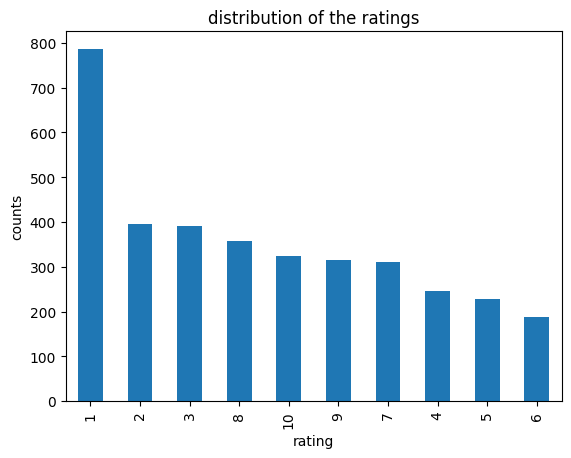

In [ ]:
dataset['stars'].value_counts().plot(kind='bar')
plt.title('distribution of the ratings')
plt.xlabel('rating')
plt.ylabel('counts')
plt.show()

Many of the people gave 1 star. The other distribution of stars are so close that we cannot comment anything about this.

**How many good or bad rating?**

In [ ]:
dataset.head()

,Unnamed: 0,reviews,date,country,stars,verified,corpus,year,month
0,0,✅ Trip Verified | BA overbook every flight to ...,2023-05-17,United Kingdom,1,True,ba overbook every flight maximise income regar...,2023,5
1,1,✅ Trip Verified | \nThe flights were all on t...,2023-05-17,United Kingdom,1,True,flight time except belfast london never staff ...,2023,5
2,2,Not Verified | Only the second time flying BA ...,2023-05-14,United States,3,False,second time flying ba first time positive coul...,2023,5
3,3,✅ Trip Verified | I wasn't going to bother rev...,2023-05-14,United Kingdom,3,True,going bother reviewing flight seem perpetual d...,2023,5
4,4,✅ Trip Verified | I booked business class tic...,2023-05-13,United States,1,True,booked business class ticket fianc reschedule ...,2023,5


In [ ]:
dataset['stars'].value_counts()

1     786
2     395
3     390
8     357
10    325
9     315
7     310
4     245
5     229
6     188
Name: stars, dtype: int64

Creating a column that contains bad,average or good based on the number of stars obtained in each row. 1-3 implies bad, 4-6 implies average and 7-10 implies good.

In [ ]:
def label_race (row):
   if row['stars']==1 :
      return 'Bad'
   if row['stars']==2 :
      return 'Bad'
   if row['stars']==3 :
      return 'Bad'
   if row['stars']==4 :
      return 'Average'
   if row['stars']==5 :
      return 'Average'
   if row['stars']==6 :
      return 'Average'
   if row['stars']==7 :
      return 'Good'
   if row['stars']==8 :
      return 'Good'
   if row['stars']==9 :
      return 'Good'
   if row['stars']==10 :
      return 'Good'


In [ ]:
dataset_class=dataset.apply (lambda row: label_race(row), axis=1)
dataset_class_df=pd.DataFrame(dataset_class)
dataset_class_df.value_counts()

Bad        1571
Good       1307
Average     662
dtype: int64

In [ ]:
dataset=pd.concat([dataset,dataset_class_df],axis=1)
dataset.head()

,Unnamed: 0,reviews,date,country,stars,verified,corpus,year,month,0
0,0,✅ Trip Verified | BA overbook every flight to ...,2023-05-17,United Kingdom,1,True,ba overbook every flight maximise income regar...,2023,5,Bad
1,1,✅ Trip Verified | \nThe flights were all on t...,2023-05-17,United Kingdom,1,True,flight time except belfast london never staff ...,2023,5,Bad
2,2,Not Verified | Only the second time flying BA ...,2023-05-14,United States,3,False,second time flying ba first time positive coul...,2023,5,Bad
3,3,✅ Trip Verified | I wasn't going to bother rev...,2023-05-14,United Kingdom,3,True,going bother reviewing flight seem perpetual d...,2023,5,Bad
4,4,✅ Trip Verified | I booked business class tic...,2023-05-13,United States,1,True,booked business class ticket fianc reschedule ...,2023,5,Bad


In [ ]:
dataset=dataset.rename(columns={0:'review_class'})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    3540 non-null   int64 
 1   reviews       3540 non-null   object
 2   date          3540 non-null   object
 3   country       3540 non-null   object
 4   stars         3540 non-null   int64 
 5   verified      3540 non-null   bool  
 6   corpus        3540 non-null   object
 7   year          3540 non-null   int64 
 8   month         3540 non-null   int64 
 9   review_class  3540 non-null   object
dtypes: bool(1), int64(4), object(5)
memory usage: 252.5+ KB


<Axes: xlabel='review_class', ylabel='count'>

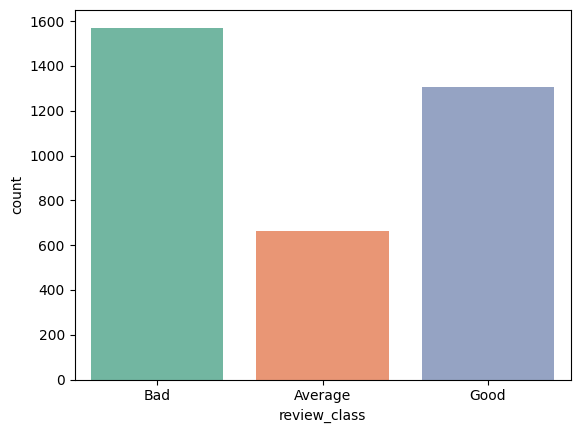

In [ ]:
sns.countplot(x ='review_class', data = dataset, palette = "Set2")

So most of the ratings are either bad or good. Some people says its bad and some people says it good. I will find what are the factors that affects the good and the bad rating.

**From which country most of the review came from?**


In [ ]:
print('Total number of unique countries : ',dataset['country'].nunique())

Total number of unique countries :  68


In [ ]:
countries=dataset['country'].value_counts()
countries_dataset=pd.DataFrame(countries)
top_5_countries=countries_dataset.head()
top_5_countries

,country
United Kingdom,2248
United States,376
Australia,150
Canada,106
Germany,60


Text(0.5, 1.0, 'Top 5 countries from where reviews came ')

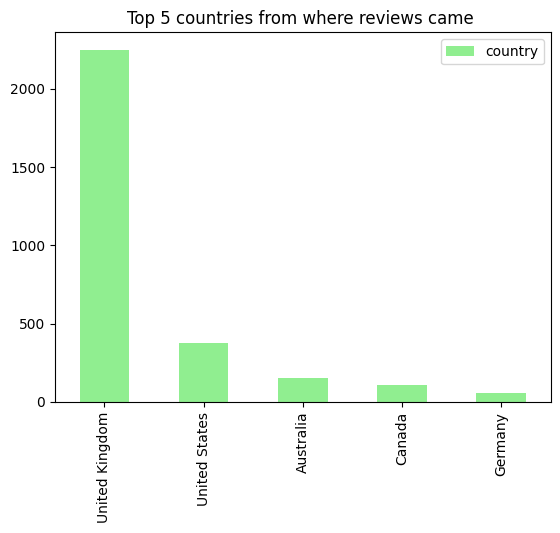

In [ ]:
top_5_countries.plot(kind='bar',color='lightgreen')
plt.title('Top 5 countries from where reviews came ')

Thus most of the reviews are coming from countries like United Kingdom followed by United States followed by Australia, Canada and Germany.

**Which countries provided on average highest ratings?**

In [ ]:
dataset.head()

,Unnamed: 0,reviews,date,country,stars,verified,corpus,year,month,review_class
0,0,✅ Trip Verified | BA overbook every flight to ...,2023-05-17,United Kingdom,1,True,ba overbook every flight maximise income regar...,2023,5,Bad
1,1,✅ Trip Verified | \nThe flights were all on t...,2023-05-17,United Kingdom,1,True,flight time except belfast london never staff ...,2023,5,Bad
2,2,Not Verified | Only the second time flying BA ...,2023-05-14,United States,3,False,second time flying ba first time positive coul...,2023,5,Bad
3,3,✅ Trip Verified | I wasn't going to bother rev...,2023-05-14,United Kingdom,3,True,going bother reviewing flight seem perpetual d...,2023,5,Bad
4,4,✅ Trip Verified | I booked business class tic...,2023-05-13,United States,1,True,booked business class ticket fianc reschedule ...,2023,5,Bad


In [ ]:
df_country_rating=pd.DataFrame(dataset.groupby('country')['stars'].mean())
df_country_rating=df_country_rating.sort_values('stars',ascending=False)

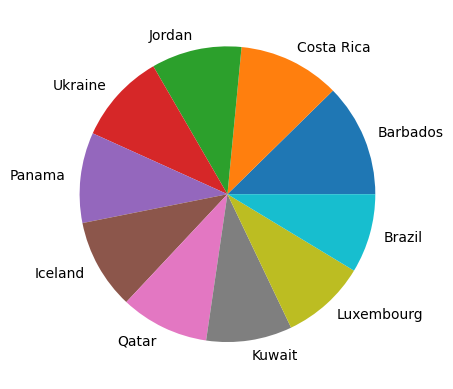

In [ ]:
df_country_rating_10=df_country_rating.head(10)
plt.pie(df_country_rating_10["stars"], labels = df_country_rating_10.index)
plt.show()

Thus top 10 countries from where the average good ratings are coming from are Jordan, Costa Rica, Barbados, Brazil, Luxembourg, Kuwait, Qatar, Iceland, Panama, Ukraine.

**In which year did most review come ?**

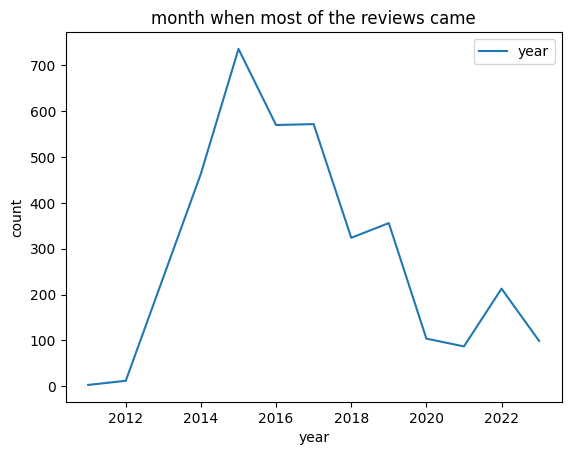

In [ ]:
df_review=pd.DataFrame(dataset['year'].value_counts())
sns.lineplot(df_review)
plt.title('month when most of the reviews came')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

It is very evedient that people did not give more reviews on 2020 and 2021. Because of COVID19 there was a very very less demand of aeroplane and thus minimum amount of review.

**Which are the words mostly used in the reviews?**

In [ ]:
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from wordcloud import WordCloud 

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

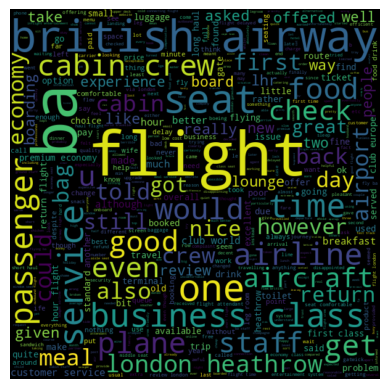

In [ ]:
reviews=" ".join(dataset.corpus)
stopwords = set(stopwords.words('english'))
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Removing the words from this list which has no significance meaning in the task.

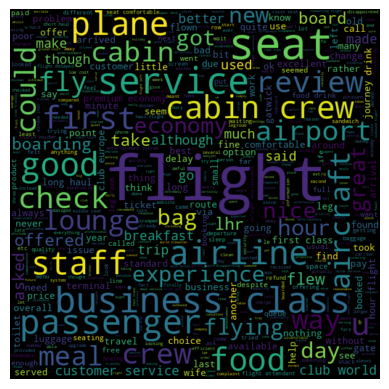

In [ ]:
reviews=" ".join(dataset.corpus)
stopwords.update(["ba","told","get","even","british airway","would","given","well","london","heathrow","return","also","like","back","time","two","1hr",
                  "however","really","people","still","one","british","airway"])
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Thus I see people are mostly talking about  seat,service, cabin crew, airport, boarding, staff, business class, food, aircraft, delay, economy, lounge, price etc which we can see here. Let's see how many times are the words repeated.

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
words=reviews.split(" ")
stopwords = text.ENGLISH_STOP_WORDS.union(["ba","told","get","even","british airway","would","given","well","london","heathrow","return","also","like","back","time","two","1hr",
                  "however","really","people","still","one","british","airway"])
nlp_words=FreqDist(words).most_common(20)
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'flight'),
  Text(1, 0, 'ba'),
  Text(2, 0, 'seat'),
  Text(3, 0, 'service'),
  Text(4, 0, 'time'),
  Text(5, 0, 'food'),
  Text(6, 0, 'london'),
  Text(7, 0, 'crew'),
  Text(8, 0, 'british'),
  Text(9, 0, 'airway'),
  Text(10, 0, 'good'),
  Text(11, 0, 'cabin'),
  Text(12, 0, 'class'),
  Text(13, 0, 'hour'),
  Text(14, 0, 'airline'),
  Text(15, 0, 'one'),
  Text(16, 0, 'staff'),
  Text(17, 0, 'business'),
  Text(18, 0, 'heathrow'),
  Text(19, 0, 'would')])

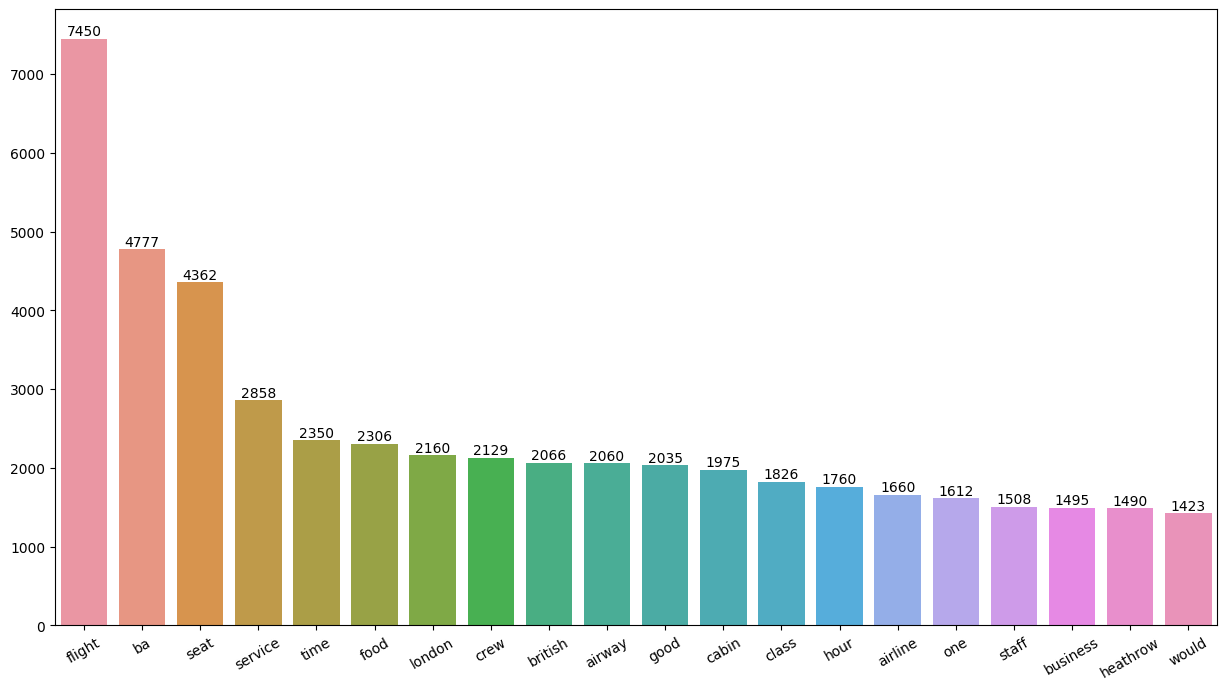

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This tells us what the customers are really talking about. "seat","service","time","food","crew","cabin","class","staff" are the few hot topics. But since we cannot understand the emotion behind each of the words I find ngrams.

In [ ]:
dataset.head()

,Unnamed: 0,reviews,date,country,stars,verified,corpus,year,month,review_class
0,0,✅ Trip Verified | BA overbook every flight to ...,2023-05-17,United Kingdom,1,True,ba overbook every flight maximise income regar...,2023,5,Bad
1,1,✅ Trip Verified | \nThe flights were all on t...,2023-05-17,United Kingdom,1,True,flight time except belfast london never staff ...,2023,5,Bad
2,2,Not Verified | Only the second time flying BA ...,2023-05-14,United States,3,False,second time flying ba first time positive coul...,2023,5,Bad
3,3,✅ Trip Verified | I wasn't going to bother rev...,2023-05-14,United Kingdom,3,True,going bother reviewing flight seem perpetual d...,2023,5,Bad
4,4,✅ Trip Verified | I booked business class tic...,2023-05-13,United States,1,True,booked business class ticket fianc reschedule ...,2023,5,Bad


In [ ]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams


In [ ]:
reviews = " ".join(dataset.corpus)
words = reviews.split(" ")
new_words = [word for word in words if word not in stopwords]
def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    ngrams = ngrams(new_words, number_of_ngrams)
    ngram_fd = FreqDist(ngrams).most_common(40)
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax

<Axes: >

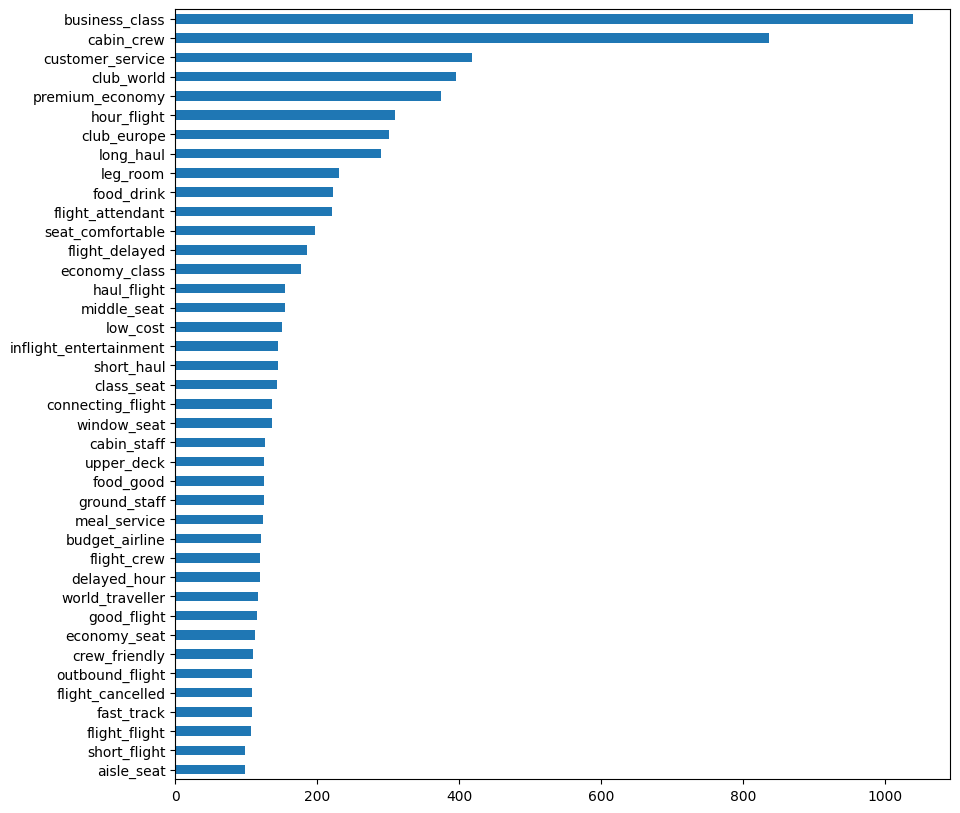

In [ ]:
get_freq_dist(new_words,2)

<Axes: >

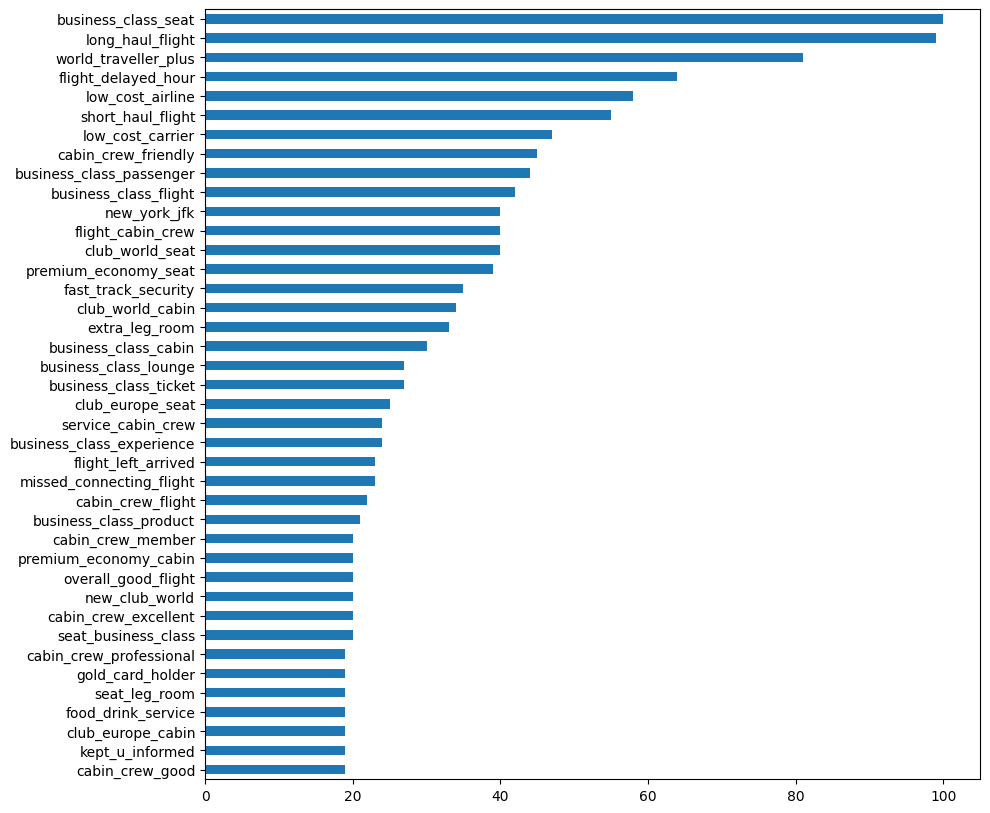

In [ ]:
get_freq_dist(new_words,3)

<Axes: >

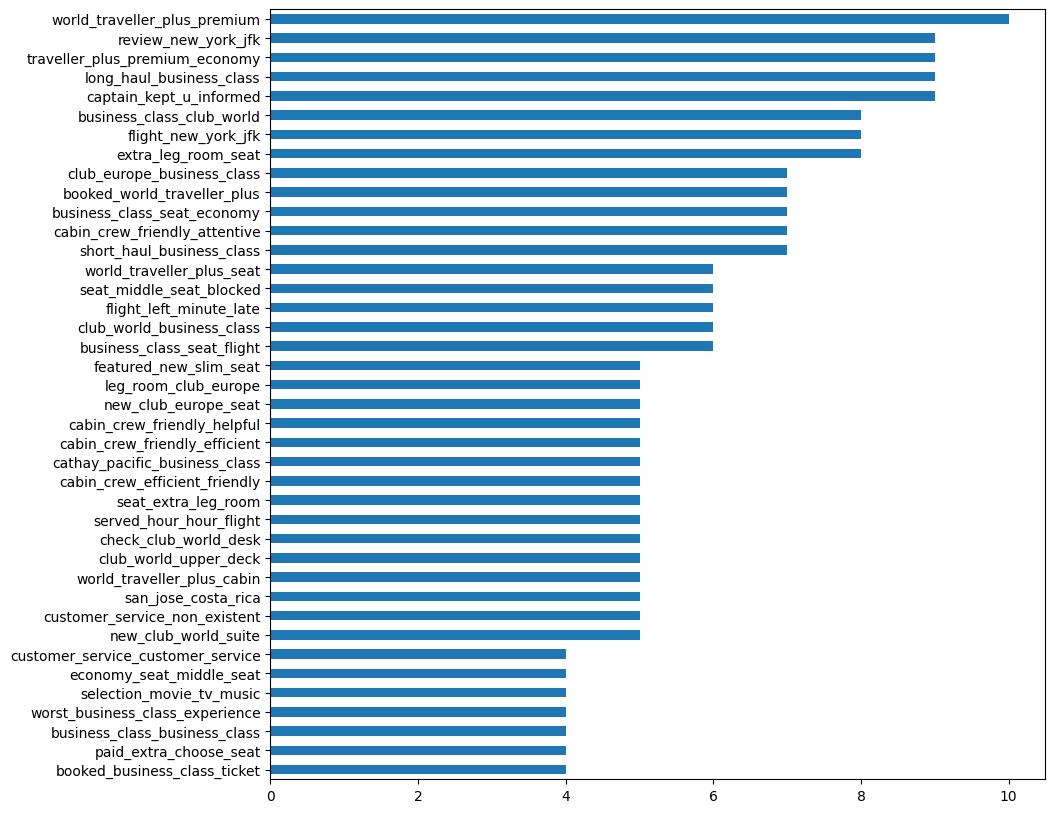

In [ ]:
get_freq_dist(new_words,4)

It seems that there is a positive talk about the cabin crew. So certainly customers are providing good reviews about cabin crew staff of British Airways. To get more understanding I group by the stars each review got. Let's suppose rating 1-3 means it is a bad review, rating 4-6 implies average experience and rating 7-10 means very good experience.

In [ ]:
ratings_1_3=dataset[dataset['stars'].isin([1,2,3])]
ratings_4_6=dataset[dataset['stars'].isin([4,5,6])]
ratings_7_10=dataset[dataset['stars'].isin([7,8,9,10])]


In [ ]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

In [ ]:
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")

In [ ]:
new_words_1_3 = [word for word in words_1_3 if word not in stopwords]
new_words_4_6 = [word for word in words_4_6 if word not in stopwords]
new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

<Axes: >

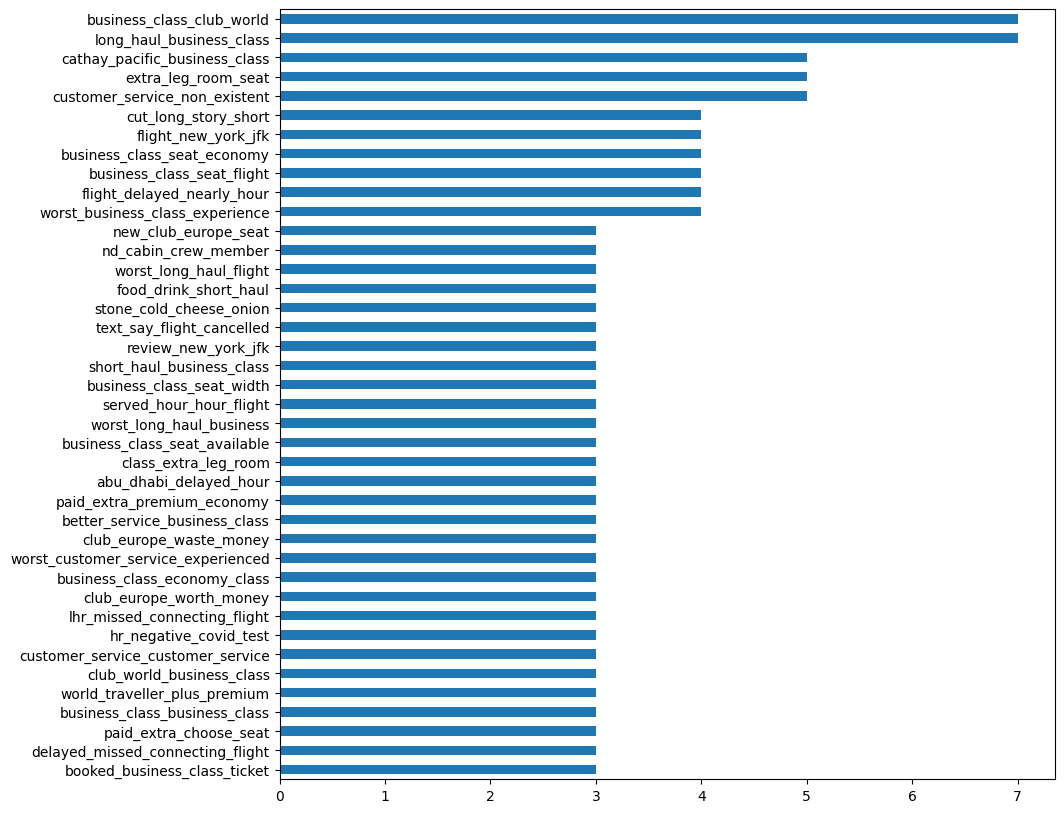

In [ ]:
get_freq_dist(new_words_1_3,4)

Thus I got that bad reviews talk about customer service, business class seat, flight delay, food, flight haul and extra payment to choose seat.

<Axes: >

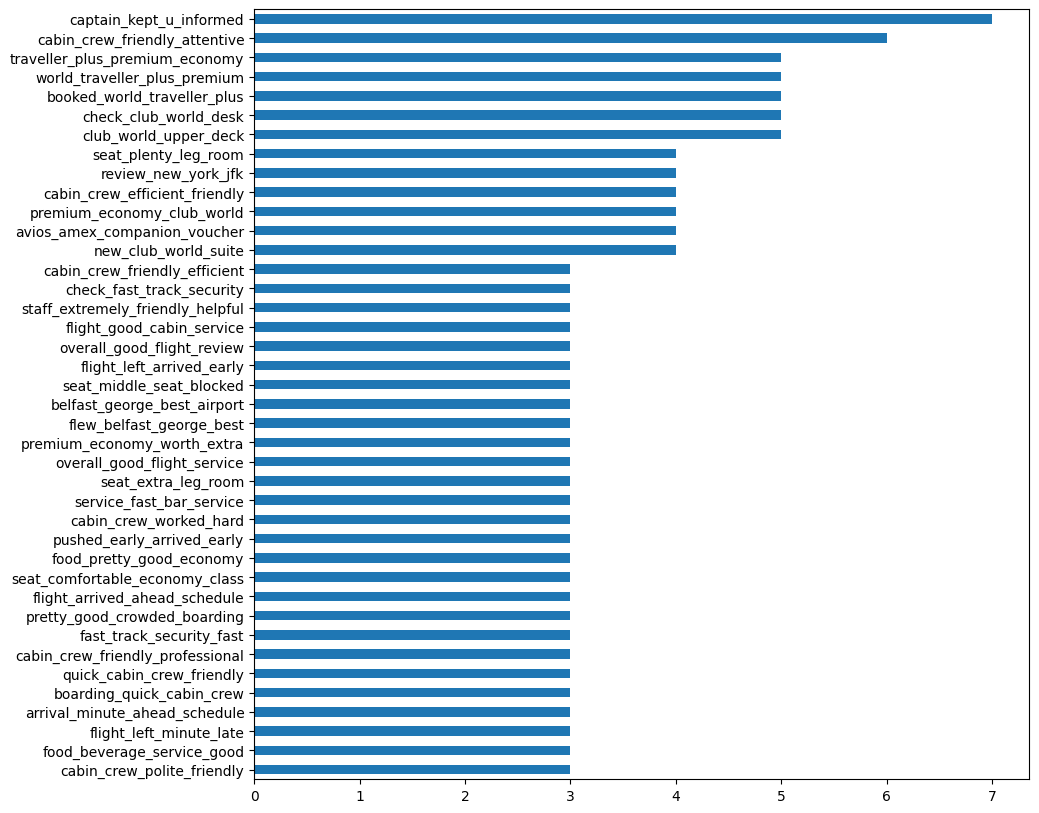

In [ ]:
get_freq_dist(new_words_7_10,4)

Good reviews talk about captain, cabin crew, food and drink, upper deck and premium economy.

Thus I get the points on which British Airways should work on and also the points people are liking. Improving these will help them to gain more customers.